In [1]:
import os
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from time import time
import plotly.express as px

#pytorch
import torch
from torch import nn
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torch import optim
#tensorflow
import tensorflow as tf
import PIL
import PIL.Image
import pathlib
from tensorflow.keras import datasets, layers, models, losses, utils, Model
from tensorflow.keras.layers import TimeDistributed, LSTM, Dense
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
output = pd.read_csv('/content/drive/MyDrive/THESIS/y_district14_9months.csv')
date_names = output['date'].unique()
print(output.head(4))
print('The number of rows in the output: ', len(output))

data_dir = pathlib.Path('/content/drive/MyDrive/THESIS/9_months/images_9months_10am_district14') 
path_of_images = list(data_dir.glob('*.png'))
print('The number of images: ', len(path_of_images))
path_of_images[:10] # the first 10 path of the images folder

         date   intensity
0  2021-10-01  665.200000
1  2021-10-02  529.989899
2  2021-10-03  326.111111
3  2021-10-04  740.948980
The number of rows in the output:  273
The number of images:  273


[PosixPath('/content/drive/MyDrive/THESIS/9_months/images_9months_10am_district14/2022-04-06.png'),
 PosixPath('/content/drive/MyDrive/THESIS/9_months/images_9months_10am_district14/2022-04-20.png'),
 PosixPath('/content/drive/MyDrive/THESIS/9_months/images_9months_10am_district14/2022-04-19.png'),
 PosixPath('/content/drive/MyDrive/THESIS/9_months/images_9months_10am_district14/2022-04-18.png'),
 PosixPath('/content/drive/MyDrive/THESIS/9_months/images_9months_10am_district14/2022-04-17.png'),
 PosixPath('/content/drive/MyDrive/THESIS/9_months/images_9months_10am_district14/2022-04-16.png'),
 PosixPath('/content/drive/MyDrive/THESIS/9_months/images_9months_10am_district14/2022-04-15.png'),
 PosixPath('/content/drive/MyDrive/THESIS/9_months/images_9months_10am_district14/2022-04-14.png'),
 PosixPath('/content/drive/MyDrive/THESIS/9_months/images_9months_10am_district14/2022-04-13.png'),
 PosixPath('/content/drive/MyDrive/THESIS/9_months/images_9months_10am_district14/2022-04-12.png')]

In [4]:
import calendar
from datetime import date
# get weekday name
# get day name in english

output['date'] = pd.to_datetime(output['date'])
type(output['date'])
output['day name'] = output['date'].dt.day_name()
output.head(5)

,date,intensity,day name
0,2021-10-01,665.200000,Friday
1,2021-10-02,529.989899,Saturday
2,2021-10-03,326.111111,Sunday
3,2021-10-04,740.948980,Monday
4,2021-10-05,679.295918,Tuesday


In [5]:
plt.rcParams["figure.figsize"] = (15,10)

fig = px.line(output, x='date', y="intensity",
              title='The evaluation of Traffic Intensity at 10 in the morning for each day',hover_data=["day name"])
fig.update_layout(hovermode="x unified")
fig.show()

In [6]:
m = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday", "Sunday"]
by_dayname = output.groupby("day name").mean().reindex(m) 
by_dayname

,intensity
day name,
Monday,498.522157
Tuesday,531.568516
Wednesday,548.029562
Thursday,535.321277
Friday,519.296210
Saturday,407.327351
Sunday,282.081159


In [7]:
plt.rcParams["figure.figsize"] = (12,8)

fig = px.bar(by_dayname, color=by_dayname.index, y='intensity',
              title='The average Traffic Intensity for each day of the week(At 10 in the morning)')
fig.update_layout(hovermode="x")
fig.show()

There is a clear weekly seasonality in the data. It is increasing from Monday and decreasing on Sunday.

In [ ]:
# CNN-based feature extraction using the VGG16 network

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model

# Dimensions of the input image
HOR_SIZE_CNN = 224
VER_SIZE_CNN = 224

# Load CNN model
model = VGG16()
# Remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

output = pd.read_csv('/content/drive/MyDrive/THESIS/y_district14.csv')
date_names = output['date'].unique()
Y_train = output['intensity']

data_dir = pathlib.Path('/content/drive/MyDrive/THESIS/images') 
path_of_images = list(data_dir.glob('*.png'))
print('The number of images: ', len(path_of_images))
path_of_images[:10] # the first 10 path of the images folder
print("")
train_paths = path_of_images
print("The images for training: ", len(train_paths))

553476096/553467096 [==============================] - 15s 0us/step
The number of images:  151

The images for training:  151


In [ ]:
#########################################
# Feature extraction for the training set
print("CNN Features of Training Images:")
print("")
Xtrain_CNN = []
for i in range(0, len(train_paths)):
   image_name = train_paths[i]
   print(image_name)
   
   # Load an image from file
   x = load_img(image_name, target_size=(HOR_SIZE_CNN, VER_SIZE_CNN))
   # Convert the image pixels to a numpy array
   x = img_to_array(x)
   print('The shape of the loaded image array: ', x.shape)
   # Reshape data for the model
   x = np.expand_dims(x, axis=0)
   # Prepare the image for the VGG model
   x = preprocess_input(x)
 	 
   print(x.shape)
   # Get CNN features
   features = model.predict(x)
   
   # Update the data
   Xtrain_CNN.append(features)

print("Train images-CNN features are extracted successfully!")
Xtrain_CNN = np.squeeze(np.array(Xtrain_CNN))
print('Size of CNN features for the training set', np.shape(Xtrain_CNN))

CNN Features of Training Images:

/content/drive/MyDrive/THESIS/images/2022-01-01.png
The shape of the loaded image array:  (224, 224, 3)
(1, 224, 224, 3)
/content/drive/MyDrive/THESIS/images/2022-01-02.png
The shape of the loaded image array:  (224, 224, 3)
(1, 224, 224, 3)
/content/drive/MyDrive/THESIS/images/2022-01-03.png
The shape of the loaded image array:  (224, 224, 3)
(1, 224, 224, 3)
/content/drive/MyDrive/THESIS/images/2022-01-04.png
The shape of the loaded image array:  (224, 224, 3)
(1, 224, 224, 3)
/content/drive/MyDrive/THESIS/images/2022-01-05.png
The shape of the loaded image array:  (224, 224, 3)
(1, 224, 224, 3)
/content/drive/MyDrive/THESIS/images/2022-01-06.png
The shape of the loaded image array:  (224, 224, 3)
(1, 224, 224, 3)
/content/drive/MyDrive/THESIS/images/2022-01-07.png
The shape of the loaded image array:  (224, 224, 3)
(1, 224, 224, 3)
/content/drive/MyDrive/THESIS/images/2022-01-08.png
The shape of the loaded image array:  (224, 224, 3)
(1, 224, 224, 3

# Creating the Window for weekly seasonal data:

Preprocessing of the time series for deep learning
The peculiarity of the time series is that they must be divided into training and validation sets and which in turn must be divided into sequences of a length defined by our configuration. These sequences are called windows and the model will use these sequences to produce a forecast.

if we assume the timesteps is 10 then, the LSTM has learned from 10 timesteps and has attempted to predict the next 10 timesteps in the future, the whole sliding window slides one timestep to the right, and again, the whole procedure restarts.

In [ ]:
print('The shape of feature matrix after VGG16 CNN network: ', Xtrain_CNN.shape)
Xtrain_CNN[:2]
print('Feature matrix intervals: ', np.min(Xtrain_CNN), np.max(Xtrain_CNN)) 
# so the feature matrix after VGG16 must be standardize between [0,1]
Xtrain_CNN_df = pd.DataFrame(Xtrain_CNN)
Xtrain_CNN_df.head(4)

The shape of feature matrix after VGG16 CNN network:  (151, 4096)
Feature matrix intervals:  0.0 7.5135403


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.0,0.0,0.0,2.149491,0.0,0.0,1.676076,1.034836,0.0,3.791754,...,2.182351,0.0,0.0,0.0,0.194124,2.419531,0.0,0.0,0.0,0.848008
1,0.0,0.0,0.0,2.324973,0.0,0.0,1.563187,0.909224,0.0,3.687485,...,2.015227,0.0,0.0,0.0,0.331230,2.323330,0.0,0.0,0.0,0.857748
2,0.0,0.0,0.0,2.499798,0.0,0.0,1.499792,1.048844,0.0,3.707461,...,2.115249,0.0,0.0,0.0,0.508320,2.347743,0.0,0.0,0.0,0.950419
3,0.0,0.0,0.0,2.588254,0.0,0.0,1.585523,0.999789,0.0,3.704515,...,2.092511,0.0,0.0,0.0,0.553962,2.436295,0.0,0.0,0.0,0.924759


In [ ]:
Xtrain_CNN_df[0].unique()

array([0.], dtype=float32)

https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/structured_data/time_series.ipynb#scrollTo=Kem30j8QHxyW

In [ ]:
# Split the feature matrix:
column_indices = {name: i for i, name in enumerate(Xtrain_CNN_df.columns)}

n = len(Xtrain_CNN_df)
train_df = Xtrain_CNN_df[0:int(n*0.7)]
val_df = Xtrain_CNN_df[int(n*0.7):int(n*0.9)]
test_df = Xtrain_CNN_df[int(n*0.9):]

num_features = Xtrain_CNN_df.shape[1]

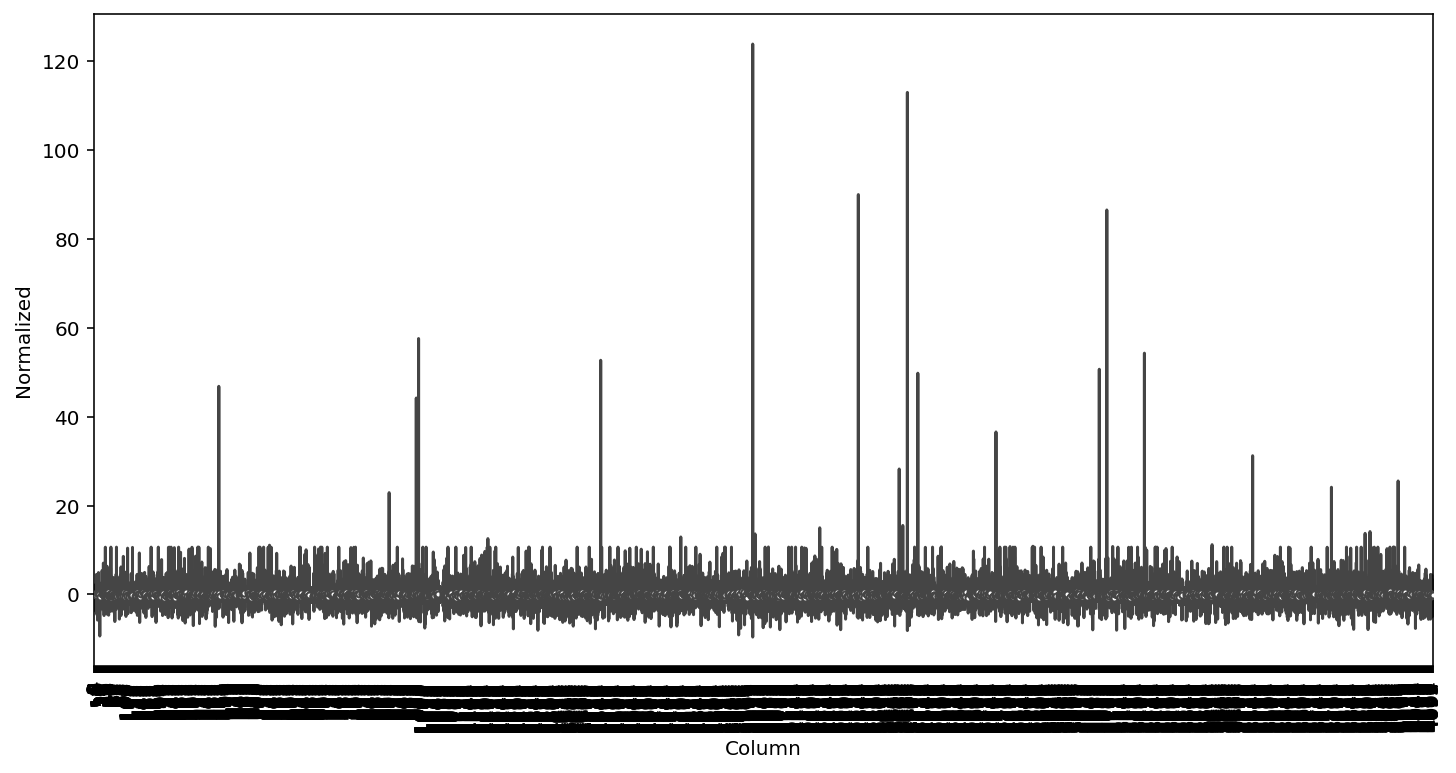

In [ ]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

df_std = (Xtrain_CNN_df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(Xtrain_CNN_df.keys(), rotation=90)

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

def get_window_data(train_data, output, window):
    # Get window data and scale
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(train_data.reshape(-1, 1))

    X = []
    y = []

    for i in range(len(data) - window):
        X.append(data[i : i + window])
        y.append(data[i + window])

    X = np.asarray(X)
    y = np.asarray(y)
    return X, y, scaler

In [ ]:
window_size = 6
X, y, scaler = get_window_data(per_day["Subject"].values, window_size)

X_train = X[:test_split]
X_test = X[test_split:]

y_train = y[:test_split]
y_test = y[test_split:]

model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")


history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=1,
    validation_data=(X_test, y_test),
    verbose=2,
    shuffle=False,
)

# plot history

plt.figure(figsize=(6, 5), dpi=600)
plt.plot(history.history["loss"], 'darkred', label="Train")
plt.plot(history.history["val_loss"], 'darkblue', label="Test")
plt.title("Loss over epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

mse_lstm = mean_squared_error(
    scaler.inverse_transform(y_test),
    scaler.inverse_transform(model.predict(X_test)),
)
print("RMSE for LSTM {:.2f}".format(np.sqrt(mse_lstm)))